In [71]:
import pandas as pd
import glob
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
def ea_rainfall_offsets(df_rainfall,timestep_minutes) -> pd.DataFrame():
    df_rainfall_offsets = df_rainfall
    offset_hours = [1,2,4,6,12,24,48,72,120,240]
    periods =[int(offset*(60/timestep_minutes)) for offset in offset_hours]
    df_rainfall_offsets =df_rainfall_offsets['value'].shift(periods=periods)
    
    return df_rainfall_offsets

In [73]:
def ea_rainfall_accumulations(df_rainfall,accumulations_list) -> pd.DataFrame():
    df_rainfall_accumulations = df_rainfall
    for window in accumulations_list:
        df_rainfall_accumulations[f'{window}_rolling_accumuation'] = df_rainfall_accumulations['value'].rolling(window=window).sum()
    return df_rainfall_accumulations

In [74]:
df_ds_tona_ammonia = pd.read_parquet('datasets\Hilden Brook\HILDEN BROOK_DS HILDEN GRANGE_E_202110-AMMONIUM-900.parquet') 

In [75]:
df_us_glen_ammonia = pd.read_parquet('datasets\Hilden Brook\HILDEN BROOK_US GLENDALE NURSERY_E_202310-CONDUCTIVITY-900.parquet')

In [76]:
ammonia_df_dict = {}
folder_path = 'datasets/Hilden Brook'
for filename in glob.glob(f"{folder_path}/*AMMONIUM*.parquet"):
    key = filename.split("_")[1]  # Extract the part between the first and second underscores
    df = pd.read_parquet(filename)
    df.rename(columns={'value':key},inplace=True)
    df = df.set_index('dateTime')
    ammonia_df_dict[key] = df

In [77]:
#ammonia_df_2023.plot(x='dateTime')

In [78]:
ton_angels_dict = {}
folder_path = 'datasets/Hilden Brook'
for filename in glob.glob(f"{folder_path}/*ANGELS*.parquet"):
    key = filename.split("-")[1]  # between dashes
    df = pd.read_parquet(filename)
    df['dateTime'] = pd.to_datetime(df['dateTime'])
    df.rename(columns={'value':key},inplace=True)
    ton_angels_dict[key] = df

In [79]:
ton_angels_df = None
i = 0
for key, df in ton_angels_dict.items():
    if ton_angels_df is None:
        ton_angels_df = df
    else:
        cols_to_use = ton_angels_df.columns.difference(df.columns)
        ton_angels_df = pd.merge(ton_angels_df, df, on='dateTime',suffixes=(f"_{i}", f"_{99-i}"))
        i+=1

In [80]:
ton_angels_df = pd.concat(ton_angels_dict.values(), ignore_index=True, join='outer')
ton_angels_df = ton_angels_df.set_index('dateTime')
# ton_angels_df = ton_angels_df.fillna(method = 'ffill')
# ton_angels_df = ton_angels_df.fillna(method = 'bfill')




In [81]:
fig = px.line(ton_angels_df,y=['PH','AMMONIUM','CONDUCTIVITY','TURBIDITY','DISSOLVED OXYGEN'])
fig.show()



c:\Anaconda3\envs\sapphire\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



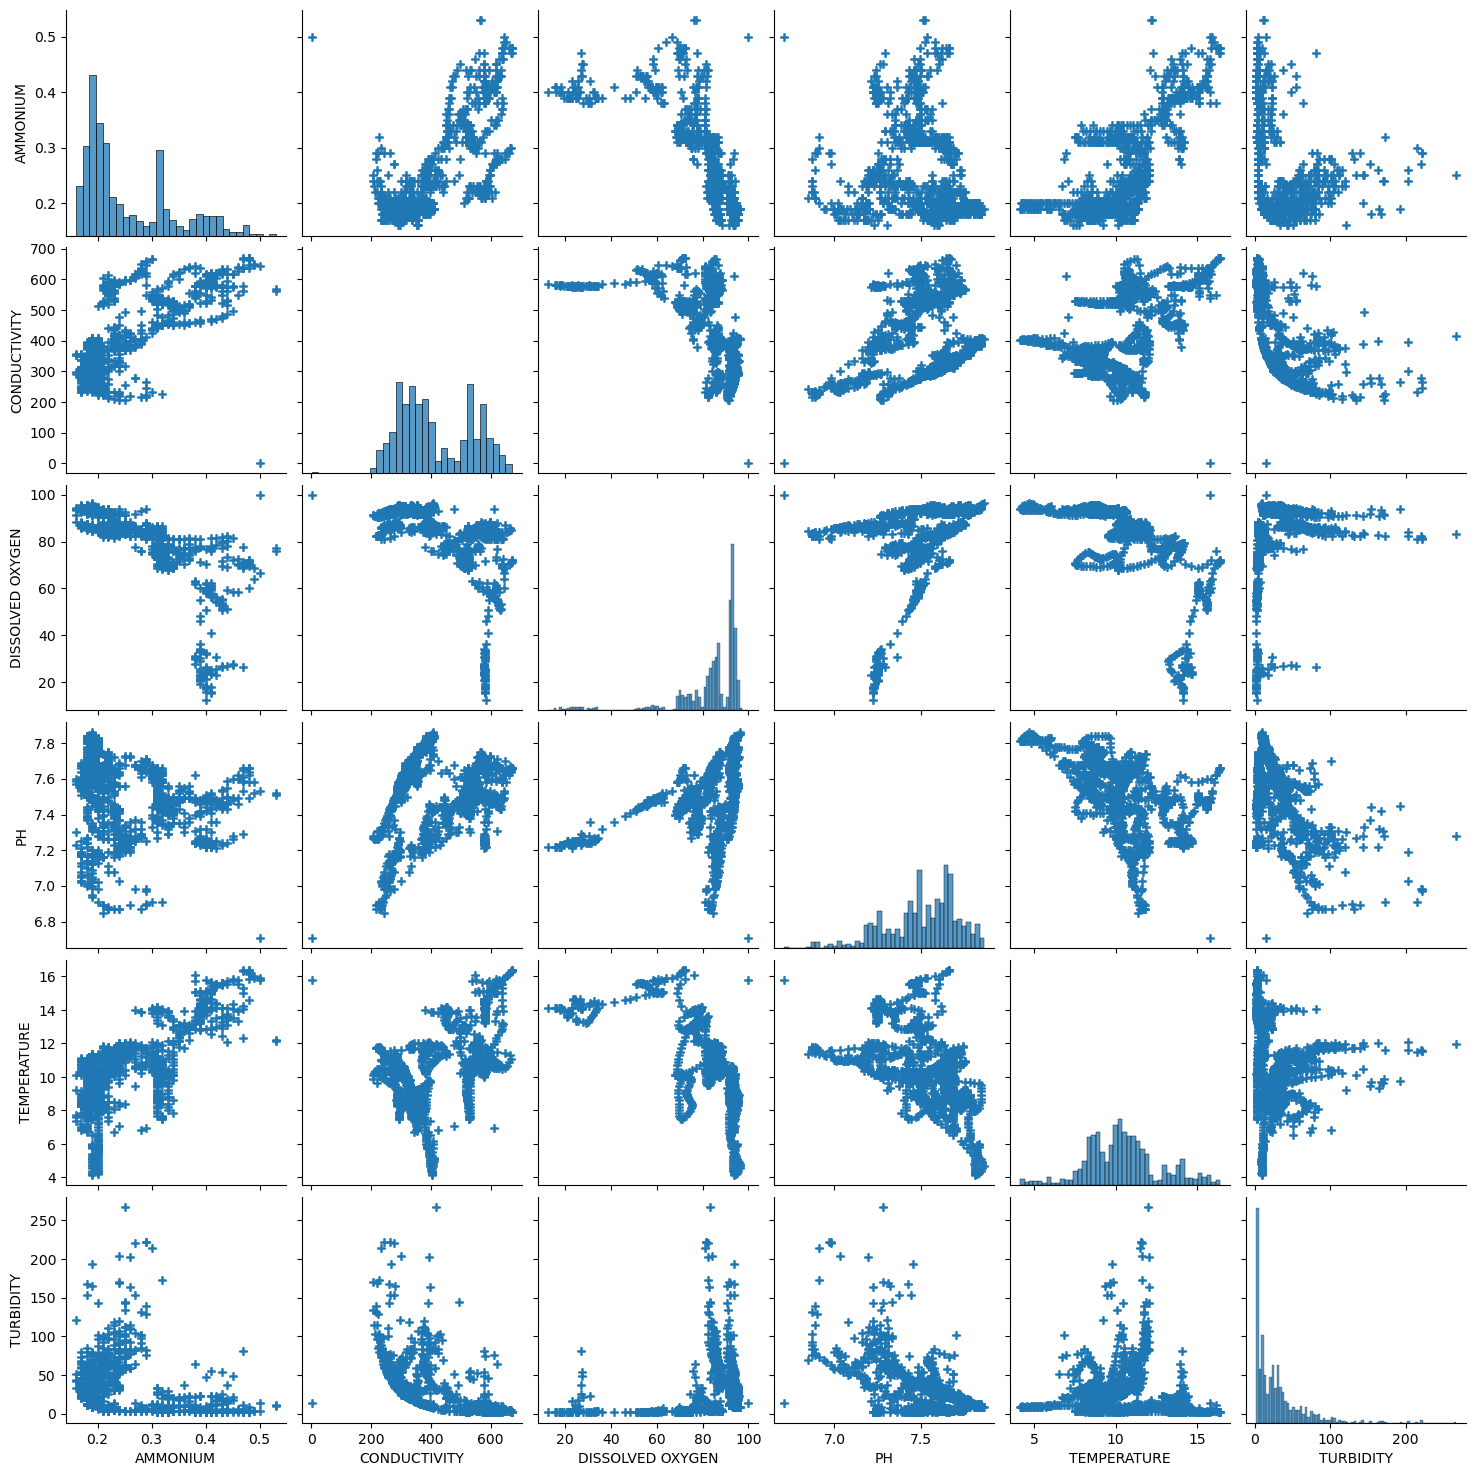

In [82]:
y_variables = ['PH', 'AMMONIUM', 'CONDUCTIVITY', 'TURBIDITY', 'DISSOLVED OXYGEN']
sns.pairplot(ton_angels_df,  kind='scatter',plot_kws=dict(marker="+", linewidth=1))

plt.show()

c:\Anaconda3\envs\sapphire\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



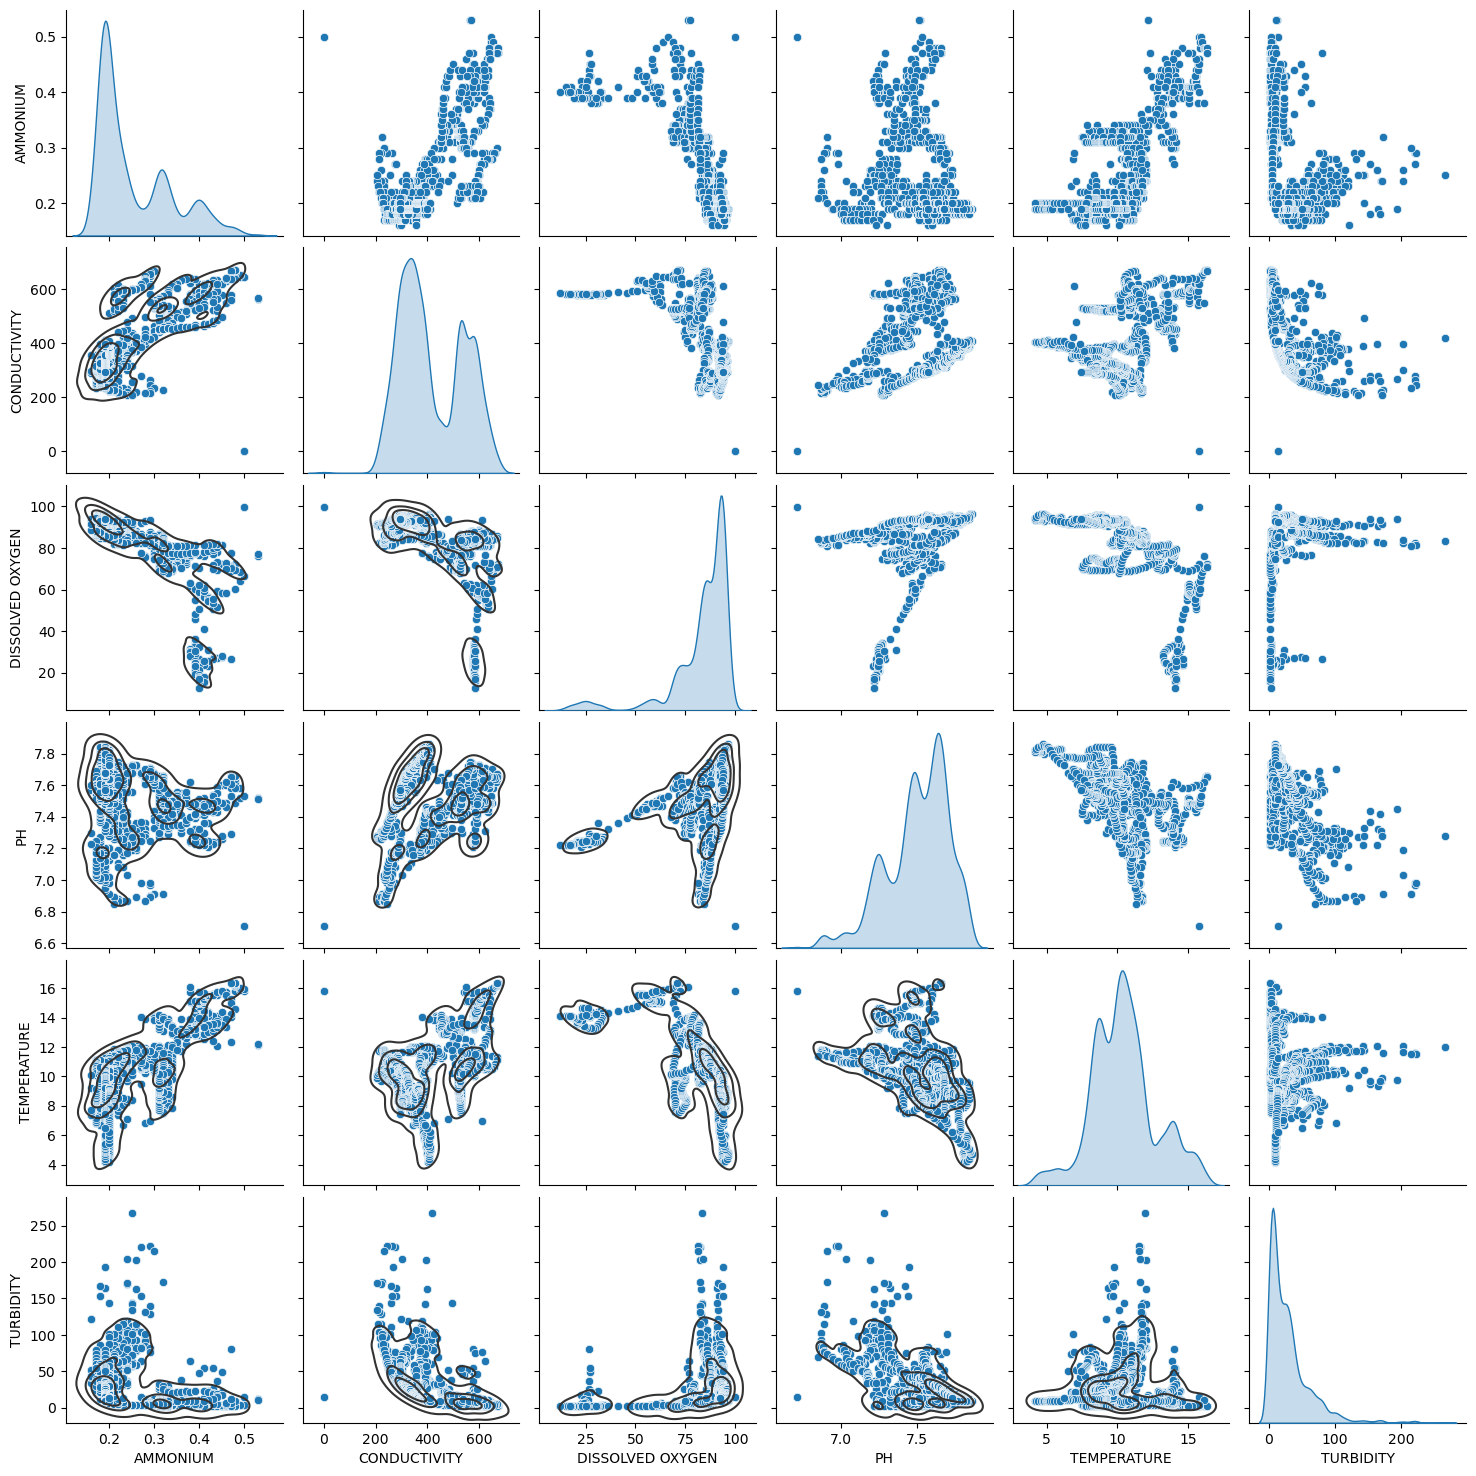

In [83]:
g = sns.pairplot(ton_angels_df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [84]:
df_rain_kilnwood = pd.read_parquet("datasets\Hilden Brook\Kiln Wood-rainfall-900.parquet")
df_rain_kilnwood['dateTime'] = pd.to_datetime(df_rain_kilnwood['dateTime'])
df_rain_kilnwood = df_rain_kilnwood.set_index('dateTime')
isbetweendates = df_rain_kilnwood.index.to_series().between('2023-01-01', '2025-01-10')
df_rain_kilnwood = df_rain_kilnwood[isbetweendates]
df_rain_kilnwood  = df_rain_kilnwood.fillna(method='bfill')
df_rain_kilnwood  = df_rain_kilnwood.fillna(method='ffill')


C:\Users\jmn\AppData\Local\Temp\ipykernel_18212\510658623.py:6: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\jmn\AppData\Local\Temp\ipykernel_18212\510658623.py:7: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [85]:
fig = px.line(df_rain_kilnwood, y='value')

fig

In [86]:
fig = px.line(ton_angels_df,x=ton_angels_df.index, y=['PH','AMMONIUM','CONDUCTIVITY','TURBIDITY','DISSOLVED OXYGEN'])
fig.show()

In [87]:
df_rain_kilnwood_offset = ea_rainfall_offsets(df_rain_kilnwood,15)
df_rain_kilnwood_offset.tail()

value_4  value_8  value_16  value_24  value_48  value_96  \
dateTime                                                                        
2024-06-21 08:00:00      0.0      0.0       0.0       0.0       0.0       0.0   
2024-06-21 08:15:00      0.0      0.0       0.0       0.0       0.0       0.0   
2024-06-21 08:30:00      0.0      0.0       0.0       0.0       0.0       0.0   
2024-06-21 08:45:00      0.0      0.0       0.0       0.0       0.0       0.0   
2024-06-21 09:00:00      0.0      0.0       0.0       0.0       0.0       0.0   

                     value_192  value_288  value_480  value_960  
dateTime                                                         
2024-06-21 08:00:00        0.0        0.0        0.0        0.0  
2024-06-21 08:15:00        0.0        0.0        0.0        0.0  
2024-06-21 08:30:00        0.0        0.0        0.0        0.0  
2024-06-21 08:45:00        0.0        0.0        0.1        0.0  
2024-06-21 09:00:00        0.0        0.0        0.0        0.0

In [88]:
df_rain_killnwood_rolling = ea_rainfall_accumulations(df_rain_kilnwood,['1h','2h','4h','6h','12h','1d','2d','5d','30d'])
df_rain_killnwood_rolling.head(10)

date  value valid invalid missing completeness  \
dateTime                                                                    
2023-01-01 00:00:00  2023-01-01   0.01     0       0     100   Incomplete   
2023-01-01 00:15:00  2023-01-01   0.03     0       0     100   Incomplete   
2023-01-01 00:30:00  2023-01-01   0.08     0       0     100   Incomplete   
2023-01-01 00:45:00  2023-01-01   0.03     0       0     100   Incomplete   
2023-01-01 01:00:00  2023-01-01   0.00     0       0     100   Incomplete   
2023-01-01 01:15:00  2023-01-01   0.00     0       0     100   Incomplete   
2023-01-01 01:30:00  2023-01-01   0.00     0       0     100   Incomplete   
2023-01-01 01:45:00  2023-01-01   0.00     0       0     100   Incomplete   
2023-01-01 02:00:00  2023-01-01   0.00     0       0     100   Incomplete   
2023-01-01 02:15:00  2023-01-01   0.00     0       0     100   Incomplete   

                    quality  \
dateTime                      
2023-01-01 00:00:00    Good   
2023-01-01 00:15:00    Good   
2023-01-01 00:30:00    Good   
2023-01-01 00:45:00    Good   
2023-01-01 01:00:00    Good   
2023-01-01 01:15:00    Good   
2023-01-01 01:30:00    Good   
2023-01-01 01:45:00    Good   
2023-01-01 02:00:00    Good   
2023-01-01 02:15:00    Good   

                                                           measure.@id  \
dateTime                                                                 
2023-01-01 00:00:00  http://environment.data.gov.uk/hydrology/id/me...   
2023-01-01 00:15:00  http://environment.data.gov.uk/hydrology/id/me...   
2023-01-01 00:30:00  http://environment.data.gov.uk/hydrology/id/me...   
2023-01-01 00:45:00  http://environment.data.gov.uk/hydrology/id/me...   
2023-01-01 01:00:00  http://environment.data.gov.uk/hydrology/id/me...   
2023-01-01 01:15:00  http://environment.data.gov.uk/hydrology/id/me...   
2023-01-01 01:30:00  http://environment.data.gov.uk/hydrology/id/me...   
2023-01-01 01:45:00  http://environment.data.gov.uk/hydrology/id/me...   
2023-01-01 02:00:00  http://environment.data.gov.uk/hydrology/id/me...   
2023-01-01 02:15:00  http://environment.data.gov.uk/hydrology/id/me...   

                     1h_rolling_accumuation  2h_rolling_accumuation  \
dateTime                                                              
2023-01-01 00:00:00                    0.01                    0.01   
2023-01-01 00:15:00                    0.04                    0.04   
2023-01-01 00:30:00                    0.12                    0.12   
2023-01-01 00:45:00                    0.15                    0.15   
2023-01-01 01:00:00                    0.14                    0.15   
2023-01-01 01:15:00                    0.11                    0.15   
2023-01-01 01:30:00                    0.03                    0.15   
2023-01-01 01:45:00                    0.00                    0.15   
2023-01-01 02:00:00                    0.00                    0.14   
2023-01-01 02:15:00                    0.00                    0.11   

                     4h_rolling_accumuation  6h_rolling_accumuation  \
dateTime                                                              
2023-01-01 00:00:00                    0.01                    0.01   
2023-01-01 00:15:00                    0.04                    0.04   
2023-01-01 00:30:00                    0.12                    0.12   
2023-01-01 00:45:00                    0.15                    0.15   
2023-01-01 01:00:00                    0.15                    0.15   
2023-01-01 01:15:00                    0.15                    0.15   
2023-01-01 01:30:00                    0.15                    0.15   
2023-01-01 01:45:00                    0.15                    0.15   
2023-01-01 02:00:00                    0.15                    0.15   
2023-01-01 02:15:00                    0.15                    0.15   

                     12h_rolling_accumuation  1d_rolling_accumuation  \
dateTime                                                      

In [89]:
ton_angels_df = ton_angels_df.sort_index().fillna(method='bfill').fillna(method='ffill')
ton_angles_df_reset = ton_angels_df.reset_index()
ton_angles_df_reset = ton_angles_df_reset.drop_duplicates(subset='dateTime')
ton_angels_df = ton_angles_df_reset.set_index('dateTime')

C:\Users\jmn\AppData\Local\Temp\ipykernel_18212\2488363972.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [90]:
df_ton_angles_with_rain = pd.merge_asof(ton_angels_df,df_rain_killnwood_rolling,left_index=True,right_index=True, tolerance = pd.Timedelta('15min'), direction='nearest')
df_ton_angles_with_rain.head()

date_x  AMMONIUM  quality_x  \
dateTime                                               
2023-10-09 11:25:59  2023-10-09      0.47  Unchecked   
2023-10-09 11:38:15  2023-10-09      0.45  Unchecked   
2023-10-09 11:56:44  2023-10-09      0.44  Unchecked   
2023-10-09 12:03:16  2023-10-09      0.43  Unchecked   
2023-10-09 12:07:56  2023-10-09      0.43  Unchecked   

                                                         measure.@id_x  \
dateTime                                                                 
2023-10-09 11:25:59  http://environment.data.gov.uk/hydrology/id/me...   
2023-10-09 11:38:15  http://environment.data.gov.uk/hydrology/id/me...   
2023-10-09 11:56:44  http://environment.data.gov.uk/hydrology/id/me...   
2023-10-09 12:03:16  http://environment.data.gov.uk/hydrology/id/me...   
2023-10-09 12:07:56  http://environment.data.gov.uk/hydrology/id/me...   

                     CONDUCTIVITY  DISSOLVED OXYGEN    PH  TEMPERATURE  \
dateTime                                                                 
2023-10-09 11:25:59        576.96             26.71  7.29       14.054   
2023-10-09 11:38:15        576.75             27.34  7.26       14.068   
2023-10-09 11:56:44        576.56             26.81  7.24       14.092   
2023-10-09 12:03:16        576.29             27.20  7.24       14.110   
2023-10-09 12:07:56        576.35             26.69  7.23       14.105   

                     TURBIDITY      date_y  ...  \
dateTime                                    ...   
2023-10-09 11:25:59      80.58  2023-10-09  ...   
2023-10-09 11:38:15      48.51  2023-10-09  ...   
2023-10-09 11:56:44      37.40  2023-10-09  ...   
2023-10-09 12:03:16      54.54  2023-10-09  ...   
2023-10-09 12:07:56      25.59  2023-10-09  ...   

                                                         measure.@id_y  \
dateTime                                                                 
2023-10-09 11:25:59  http://environment.data.gov.uk/hydrology/id/me...   
2023-10-09 11:38:15  http://environment.data.gov.uk/hydrology/id/me...   
2023-10-09 11:56:44  http://environment.data.gov.uk/hydrology/id/me...   
2023-10-09 12:03:16  http://environment.data.gov.uk/hydrology/id/me...   
2023-10-09 12:07:56  http://environment.data.gov.uk/hydrology/id/me...   

                    1h_rolling_accumuation 2h_rolling_accumuation  \
dateTime                                                            
2023-10-09 11:25:59                    0.0                    0.0   
2023-10-09 11:38:15                    0.0                    0.0   
2023-10-09 11:56:44                    0.0                    0.0   
2023-10-09 12:03:16                    0.0                    0.0   
2023-10-09 12:07:56                    0.0                    0.0   

                    4h_rolling_accumuation 6h_rolling_accumuation  \
dateTime                                                            
2023-10-09 11:25:59                    0.0                    0.0   
2023-10-09 11:38:15                    0.0                    0.0   
2023-10-09 11:56:44                    0.0                    0.0   
2023-10-09 12:03:16                    0.0                    0.0   
2023-10-09 12:07:56                    0.0                    0.0   

                    12h_rolling_accumuation 1d_rolling_accumuation  \
dateTime                                                             
2023-10-09 11:25:59                     0.0                    0.0   
2023-10-09 11:38:15                     0.0                    0.0   
2023-10-09 11:56:44                     0.0                    0.0   
2023-10-09 12:03:16                     0.0                    0.0   
2023-10-09 12:07:56                     0.0                    0.0   

                     2d_rolling_accumuation  5d_rolling_accumuation  \
dateTime                                                              
2023-10-09 11:25:59                     0.0                     0.0   
2023-10-09 11:38:15                     0.0  

c:\Anaconda3\envs\sapphire\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



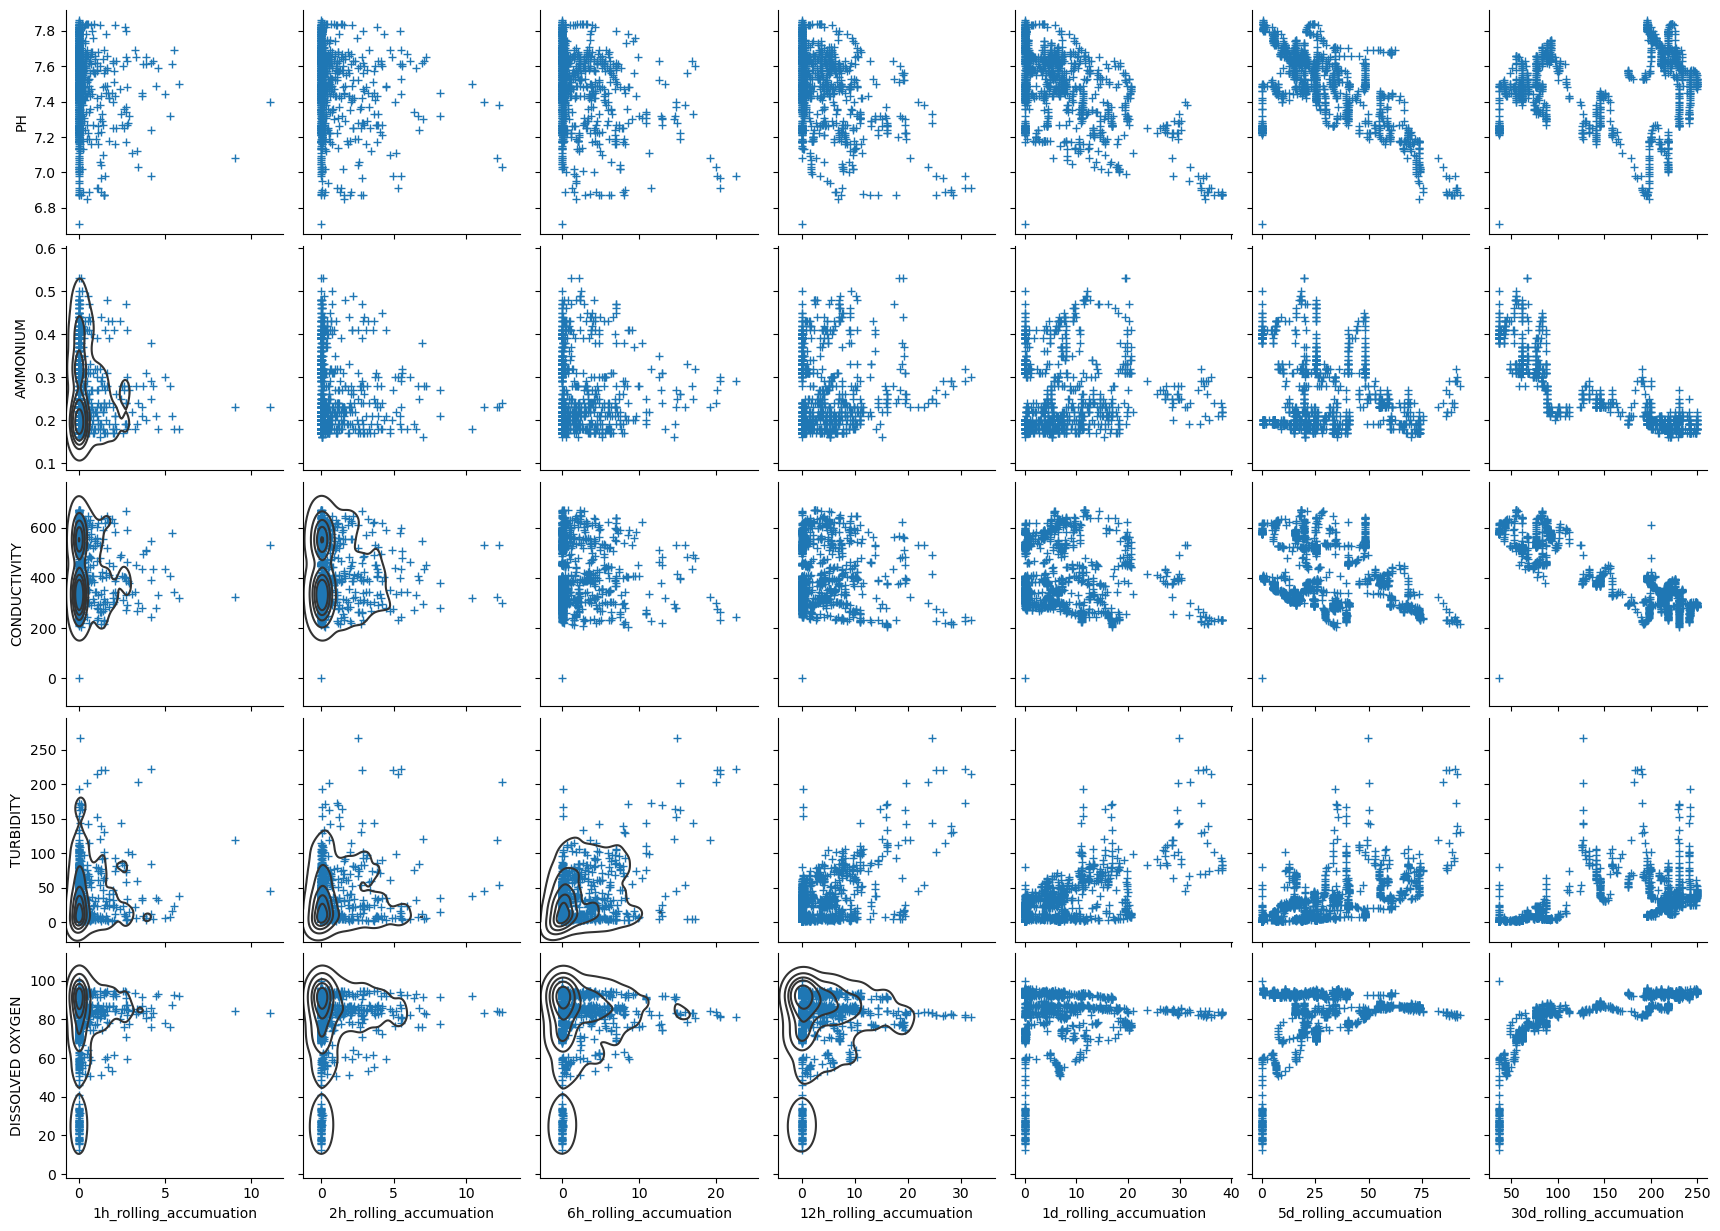

In [94]:
y_variables = ['PH', 'AMMONIUM', 'CONDUCTIVITY', 'TURBIDITY', 'DISSOLVED OXYGEN']
x_variables = ['1h_rolling_accumuation','2h_rolling_accumuation','6h_rolling_accumuation','12h_rolling_accumuation','1d_rolling_accumuation','5d_rolling_accumuation','30d_rolling_accumuation',]
g = sns.pairplot(df_ton_angles_with_rain,  kind='scatter',plot_kws=dict(marker="+", linewidth=1),x_vars=x_variables, y_vars=y_variables)
g.map_lower(sns.kdeplot, levels=6, color=".2")
